In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from data import MET_Data

In [3]:
met = MET_Data("../data/raw/MET_full_data.npz")

In [4]:
raw_data = met.query(formats = [("ivscc",)], platforms = ["patchseq", "EM"])

In [5]:
data = {"platform": [], "feature": [], "value": []}
features = met["ivscc_features"]
for (feature_vector, label) in zip(raw_data["ivscc"].T, features):
    valid = ~np.isnan(feature_vector)
    data["platform"].append(raw_data["platform"][valid])
    data["feature"].append(np.full([feature_vector[valid].size], label))
    data["value"].append(feature_vector[valid])
data = {key: np.concatenate(arr_list) for (key, arr_list) in data.items()}

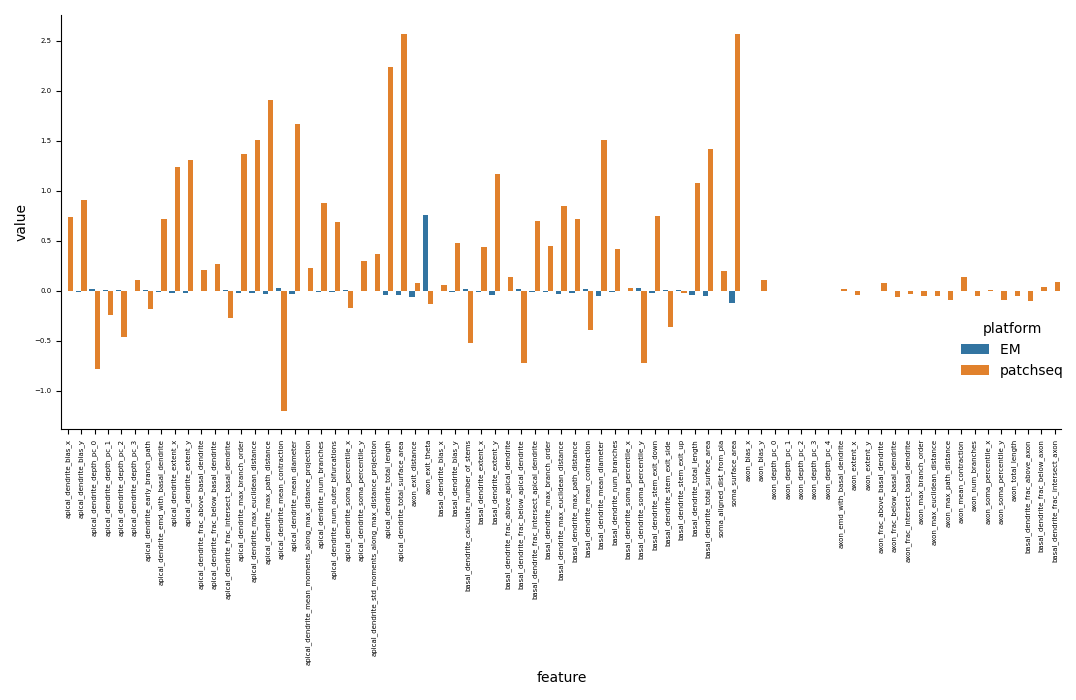

In [16]:
%matplotlib widget
sns.catplot(data = data, kind = "bar", x = "feature", y = "value", hue = "platform", height = 7, aspect = 11/8, errorbar = None)
plt.xticks(rotation = 90)
plt.tick_params(labelsize = 5)
plt.tight_layout()
plt.show()

In [17]:
feature = "apical_dendrite_bias_y"
valid = (data["feature"] == feature)

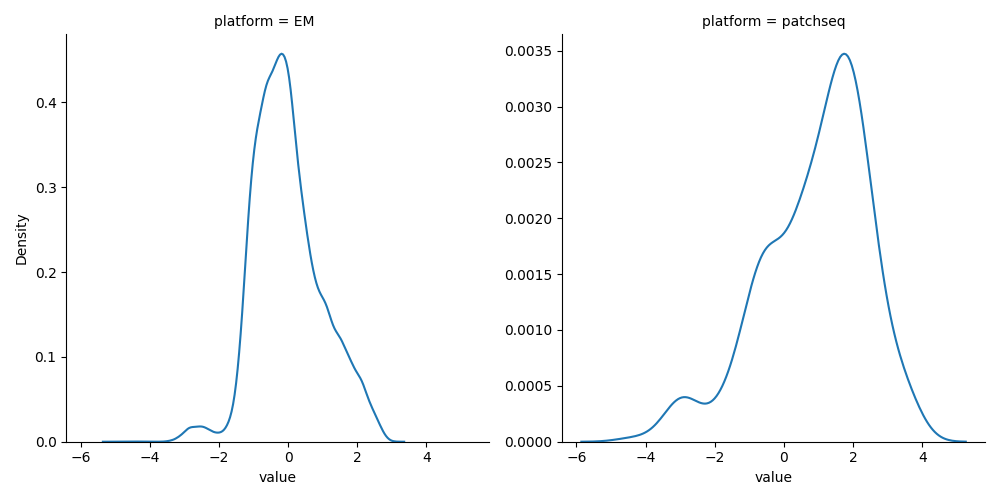

In [19]:
sns.displot(data = {key: array[valid] for (key, array) in data.items()}, kind = "kde", x = "value", col = "platform",
           facet_kws = {"sharey": False})
plt.show()

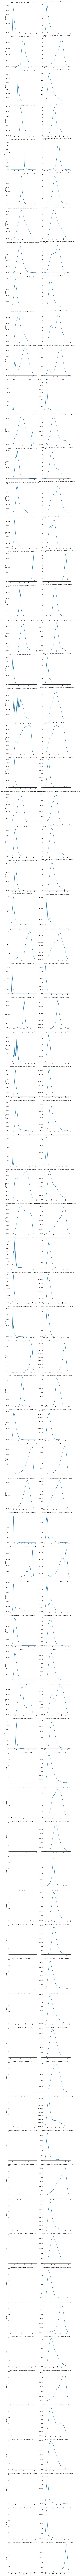

In [55]:
sns.displot(data, kind = "kde", x = "value", col = "platform", row = "feature", facet_kws = {"sharey": False, "sharex": "row"})
plt.show()